# Proyek Analisis Data: Bike Sharing
- Nama: Bagus Akhlaq
- Email: bagusakhlaq@gmail.com
- Id Dicoding: bagusakhlaq

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pengguna sepeda dari tahun 2011 sampai tahun 2012?
- Berapa banyak pengguna sepeda per hari sepanjang tahun 2011 dan 2012?
- Kapan saja waktu dengan jumlah pengguna tertinggi dan terendah?
- Bagaimana tren pengguna sepeda pada tahun 2011-2012 berdasarkan musim?
- Musim apa yang menjadi favorit pengguna untuk bersepeda?
- Apa kondisi cuaca yang terdapat paling banyak pengguna?
- Apa hubungan antara parameter cuaca dengan jumlah pengguna sepeda?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 999

## Data Wrangling

### Gathering Data

In [2]:
daily_file = "E:\DATA ANALYST\DICODING\Data Scientist - IDCAMP 2023\Beginner 4 - Belajar Analisis Data Dengan Python\Proyek Akhir\DICODING-Bike_Sharing_Dashboard\data\day.csv"
hourly_file = "E:\DATA ANALYST\DICODING\Data Scientist - IDCAMP 2023\Beginner 4 - Belajar Analisis Data Dengan Python\Proyek Akhir\DICODING-Bike_Sharing_Dashboard\data\hour.csv"

daily_df = pd.read_csv(daily_file)
hourly_df = pd.read_csv(hourly_file)

In [3]:
# Perlihatkan lima data teratas
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Cek bentuk dataframe daily_df
daily_df.shape

(731, 16)

In [5]:
hourly_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# Cek bentuk dataframe the hourly_df
hourly_df.shape

(17379, 17)

Secara keseluruhan, kedua dataframe memiliki struktur yang sama. Perbedannya hanyalah terdapat kolom `hour` pada dataframe hour_df. Tidak perlu dilakukan penggabungan data. Kita dapat menggunakan kedua data secara bergantian tergantung dari kebutuhan pada analisis. 

### Assessing Data

#### Missing Values

In [7]:
# Mengecek jumlah baris data, jumlah kolom, null, dan tipe data
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Mengecek jumlah baris data, jumlah kolom, null, dan tipe data
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat dilihat bahwa tidak ada `null` di kedua dataframe. Perlu diperhatikan tipe data `dteday` untuk disesuaikan dengan tipe data tanggal.

#### Invalid Values

Dengan melihat ringkasan data pada langkah sebelumnya, kita perlu memerhatikan kolom-kolom seperti:
* season,
* yr,
* mnth,
* holiday,
* weekday,
* workingday, dan
* weathersit

yang merupakan kolom-kolom yang memuat data kategori. Hanya saja data tersebut terdiri dari angka-angka (*label encoded*) yang membuatnya tidak informatif, sehingga sulit untuk memahami informasi apa yang terkandung di dalamnya. Maka dari itu, perlu dilakukan manipulasi data dengan memasukkan kembali nilai-nilai kategori sesuai dengan informasi di masing-masing kolom agar memberikan konteks pada data. Selain itu, data pada kolom `holiday` dan `workingday` dapat digabung menjadi satu agar mampu menyimpan informasi dengan efisien.

Di lain hal, kolom-kolom seperti:
* temp,
* atemp, dan
* windspeed

disimpan dalam bentuk yang sudah ternormalisasi. Hal ini terlihat dari nilai-nilai datanya yang berada di rentang 0 dan 1. Maka dari itu, kita perlu menonversikan data yang ternormalisasi dengan faktor pembaginya masing-masing untuk mendapatkan data aktualnya.

#### Duplicated Data

In [9]:
# Cek duplikasi data pada masing-masing kolom di datframe daily_df
for col in daily_df.columns:
    print(f"{col}: {daily_df.duplicated().sum()}")

instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
holiday: 0
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 0
windspeed: 0
casual: 0
registered: 0
cnt: 0


In [10]:
# Cek duplikasi data pada masing-masing kolom di datframe hourly_df
for col in hourly_df.columns:
    print(f"{col}: {hourly_df.duplicated().sum()}")

instant: 0
dteday: 0
season: 0
yr: 0
mnth: 0
hr: 0
holiday: 0
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 0
windspeed: 0
casual: 0
registered: 0
cnt: 0


Kedua dataframe bersih dari duplikasi data.

### Cleaning Data

Tidak banyak proses pembersihan data yang peru kita lakukan, karena secara umum data sudah berada di kondisi yang bersih. Ini adalah beberapa langkah pembersihan data yang perlu dilakukan sebelum berlanjut ke proses analisis:
1. Mengubah tipe data **dtedays** menjadi datetime
2. Mengubah data kategori menjadi informasi yang sesuai
3. Membuat kolom baru yang memuat data dari kolom: `holiday` dan `workingday` 
4. Mengonversi data numerik yang ternormalisasi dengan faktor pembaginya untuk mendapat data yang aktual

Seusai melakukan langkah-langkah di atas, kita dapat melanjutkan ke proses analisis.

#### 1. Mengubah Tipe Data

In [11]:
# 1. Ubah tipe data dtedays pada kedua dataframe dengan menggunakan FOR loop
df_list = [daily_df, hourly_df]

for df in df_list:
    df['dteday'] = pd.to_datetime(df['dteday'])

In [12]:
# Cek perubahan
print(daily_df['dteday'].info())
print('=' * 40)
print(hourly_df['dteday'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB
None


Data `dteday` sudah berhasil diubah menjadi tipe data datetime

#### Menamai Ulang Semua Kolom

Sebelum melanjutkan ke langkah pembersihan data selanjutnya, Saya ingin menamai ulang seluruh kolom pada kedua dataframe dengan penamaan yang lebih intuitif.

In [13]:
# Buat sebuah list berisikan dataframe
df_list = [daily_df, hourly_df]

# Buat sebuah dictionary berisikan nama-nama kolom baru
new_col_names = {'instant': 'id', 'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather',
                 'hr': 'hour', 'atemp': 'temp_feel', 'hum': 'humidity', 'cnt': 'total'}

# Namai ulang kolom-kolom di kedua dataframe menggunakan FOR loop
for df in df_list:
    df.rename(columns=new_col_names, inplace=True)

In [14]:
# Cek nama-nama kolom di hourly_df
hourly_df.columns

Index(['id', 'date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'temp_feel', 'humidity', 'windspeed',
       'casual', 'registered', 'total'],
      dtype='object')

#### 2. Mengubah Data Kategori (Label Encoded) Menjadi Data Aktual

Untuk melengkapi konteks data kategori, Saya menggunakan informasi yang disediakan di dalam berkas Readme.txt

In [15]:
# 2A. Mengubah data kategori yang berupa angka menjadi informasi yang sesuai

# Buat dictionary label data yang sesuai pada masing-masing kolom
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_map = {0: 2011, 1: 2012}
weekday_map = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
weather_map = {1: 'Clear, Few clouds, Partly cloudy', 
               2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
               3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
               4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
             5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
             9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Buat list dataframe
df_list = [daily_df, hourly_df]

for df in df_list:
        df['month_name'] = df['month']
        df['day_name'] = df['weekday']

# Buat list dari dictionary yang telah dibuat
dict_list = [season_map, year_map, weekday_map, weather_map, month_map]

# Buat list kolom-kolom yang akan diubah
col_list = ['season', 'year', 'day_name', 'weather', 'month_name']

# Terapkan perubahan menggunakan fungsi map() dengan FOR loop
for col, dicts in zip(col_list, dict_list):
        daily_df[col] = daily_df[col].map(dicts)
        hourly_df[col] = hourly_df[col].map(dicts)

#### Ubah `month_name` and `day_name` Menjadi Data Kategorikal  

In [16]:
# Buat list nama-nama dataframe
df_list = [daily_df, hourly_df]

# Buat list urutan data kategori
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# Urutkan data kategori berdasarkan urutannya
for df in df_list:
    df['month_name'] = pd.Categorical(df['month_name'], categories=months_order, ordered=True)
    df['day_name'] = pd.Categorical(df['day_name'], categories=day_order, ordered=True)

#### 3. Buat kolom baru yang memuat data `holiday` dan `workingday`

In [17]:
# Buat list nama-nama dataframe
df_list = [daily_df, hourly_df]

# Buat kolom baru dengan menggunakan FOR loop
for df in df_list:
    df['day_type'] = np.where((df['holiday'] == 1) & (df['workingday'] == 0), 'Holiday', 
                              np.where((df['holiday'] == 0) & (df['workingday'] == 0), 'Weekend', 'Working Day'))

#### 4. Konversi Nilai yang Ternormalisasi

In [18]:
# 4. Kalikan data numerik yang ternormalisasi dengan faktor pembaginya masing-masing (lihat Readme.txt)
# Buat list nama-nama dataframe
df_list = [daily_df, hourly_df]

# Terapkan kalkulasi pada kedua dataframe menggunakan FOR loop
for df in df_list:
    df['temp'] = df['temp'] * 41
    df['temp_feel'] = df['temp_feel'] * 50
    df['windspeed'] = df['windspeed'] * 67

# Bulatkan nilai temperatur menjadi satu desimal
col_list = ['temp', 'temp_feel']

for df, col in zip(df_list, col_list):
    df[col] = df[col].round(1)


#### Membuat Dataframe Utama

Pada tahap ini, Saya membuat salinan dataframe baru dengan mengeleminasi kolom-kolom yang tidak akan digunakan.

In [19]:
# Salin data yang diperlukan dari daily_df
day_df = daily_df[['id', 'date', 'year', 'month', 'month_name', 
                   'season', 'weekday', 'day_name','day_type', 'weather', 
                   'temp', 'temp_feel', 'humidity', 'windspeed', 
                   'casual', 'registered', 'total'
                   ]]

# Salin data yang diperlukan dari hourly_df
hour_df = hourly_df[['id', 'date', 'year', 'month', 'month_name', 
                   'season', 'weekday', 'day_name', 'day_type', 'weather',
                    'hour', 'temp', 'temp_feel', 'humidity', 'windspeed', 
                   'casual', 'registered', 'total'
                   ]]

## Exploratory Data Analysis (EDA)

In [20]:
# Lihat tiga data teratas
hour_df.head(3)

,id,date,year,month,month_name,season,weekday,day_name,day_type,weather,hour,temp,temp_feel,humidity,windspeed,casual,registered,total
0,1,2011-01-01,2011,1,Jan,Spring,6,Sat,Weekend,"Clear, Few clouds, Partly cloudy",0,9.84,14.4,0.81,0.0,3,13,16
1,2,2011-01-01,2011,1,Jan,Spring,6,Sat,Weekend,"Clear, Few clouds, Partly cloudy",1,9.02,13.6,0.80,0.0,8,32,40
2,3,2011-01-01,2011,1,Jan,Spring,6,Sat,Weekend,"Clear, Few clouds, Partly cloudy",2,9.02,13.6,0.80,0.0,5,27,32


### Kardinalitas Data Kategori

Pada tahap ini Saya memeriksa kardinalitas data kategori di kedua dataframe. Tujuan dari tahap ini adalah menghitung jumlah data yang unik dan membuat list semua nilai-nilai unik.

In [21]:
# Cek kardinalitas pada daily_df

# Buat list kolom-kolom dengan data kategori
col_list = ['season', 'year', 'month', 'day_type', 
            'weekday', 'day_name', 'weather']

# Hitung jumlah data yang unik di masing-masing kolom
print(day_df[col_list].nunique())
print('-' * 40)

# Perlihatkan semua nilai-nilai unik di masing-masing kolom
for col in col_list:
    print(f"{col}: {day_df[col].unique()}")

season       4
year         2
month       12
day_type     3
weekday      7
day_name     7
weather      3
dtype: int64
----------------------------------------
season: ['Spring' 'Summer' 'Fall' 'Winter']
year: [2011 2012]
month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
day_type: ['Weekend' 'Working Day' 'Holiday']
weekday: [6 0 1 2 3 4 5]
day_name: ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
Categories (7, object): ['Sun' < 'Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat']
weather: ['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Clear, Few clouds, Partly cloudy'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']


In [22]:
# Cek kardinalitas pada hourly_df

# Buat list kolom-kolom dengan data kategori
col_list = ['season', 'year', 'month', 'hour', 
            'day_type', 'weekday', 'day_name', 'weather']

# Hitung jumlah data yang unik di masing-masing kolom
print(hour_df[col_list].nunique())
print('-' * 40)

# Perlihatkan semua nilai-nilai unik di masing-masing kolom
for col in col_list:
    print(f"{col}: {hour_df[col].unique()}")

season       4
year         2
month       12
hour        24
day_type     3
weekday      7
day_name     7
weather      4
dtype: int64
----------------------------------------
season: ['Spring' 'Summer' 'Fall' 'Winter']
year: [2011 2012]
month: [ 1  2  3  4  5  6  7  8  9 10 11 12]
hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
day_type: ['Weekend' 'Working Day' 'Holiday']
weekday: [6 0 1 2 3 4 5]
day_name: ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
Categories (7, object): ['Sun' < 'Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat']
weather: ['Clear, Few clouds, Partly cloudy'
 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']


Kita dapat melihat di `daily_df`, ada satu data `weather` yang hilang, yaitu *heavy rain*. Pada kasus ini, mungkin data di `daily_df` hanya mengambil kondisi cuaca yang dominan atau yang terakhir tercatat di hari tersebut meskipun sangat mungkin terjadi banyak perubahan cuaca sepanjang hari.

### Statistik Deskriptif

Pada tahap ini Saya akan meneliti tentang distribusi, sebaran dan *outliers* pada data.

In [23]:
# Cek hari pertama dan terakhir di kedua dataframe
df_list = [day_df, hour_df]
df_name = ['day_df', 'hour_df']

for df, df_name in zip(df_list, df_name):
    print(f"First date in {df_name}: {df.date.min()}")
    print(f"Last date in {df_name}: {df.date.max()}")
    print('-' * 45)

First date in day_df: 2011-01-01 00:00:00
Last date in day_df: 2012-12-31 00:00:00
---------------------------------------------
First date in hour_df: 2011-01-01 00:00:00
Last date in hour_df: 2012-12-31 00:00:00
---------------------------------------------


In [24]:
# Lihat ringkasan statistik pada dataframe daily_df
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
year,731.0,2011.500684,0.500342,2011.000000,2011.000000,2012.000000,2012.000000,2012.000000
month,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
temp,731.0,20.310670,7.505342,2.400000,13.800000,20.400000,26.900000,35.300000
temp_feel,731.0,23.717699,8.148059,3.953480,16.892125,24.336650,30.430100,42.044800
humidity,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
windspeed,731.0,12.762576,5.192357,1.500244,9.041650,12.125325,15.625371,34.000021
casual,731.0,848.176471,686.622488,2.000000,315.500000,713.000000,1096.000000,3410.000000
registered,731.0,3656.172367,1560.256377,20.000000,2497.000000,3662.000000,4776.500000,6946.000000


In [25]:
# Lihat ringkasan statistik pada dataframe hourly_df
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.000,13034.5000,17379.0000
year,17379.0,2011.502561,0.500008,2011.00,2011.0000,2012.000,2012.0000,2012.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.000,10.0000,12.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.000,5.0000,6.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.000,18.0000,23.0000
temp,17379.0,20.376474,7.894801,0.82,13.9400,20.500,27.0600,41.0000
temp_feel,17379.0,23.791783,8.589473,0.00,16.7000,24.200,31.1000,50.0000
humidity,17379.0,0.627229,0.192930,0.00,0.4800,0.630,0.7800,1.0000
windspeed,17379.0,12.736540,8.196795,0.00,7.0015,12.998,16.9979,56.9969
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.000,48.0000,367.0000


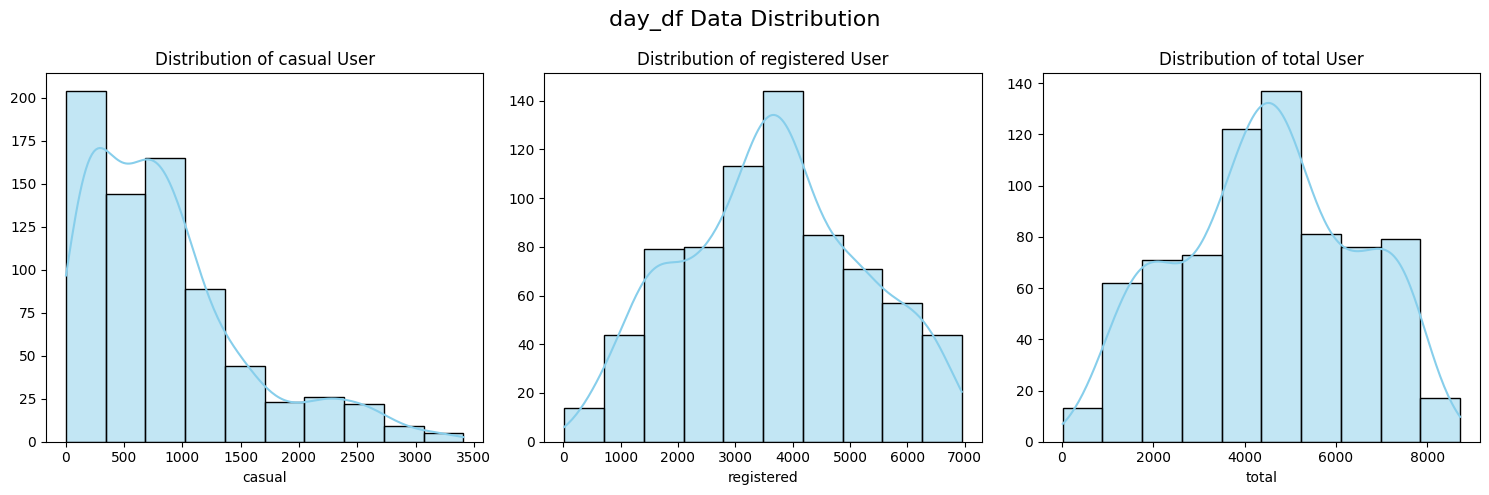

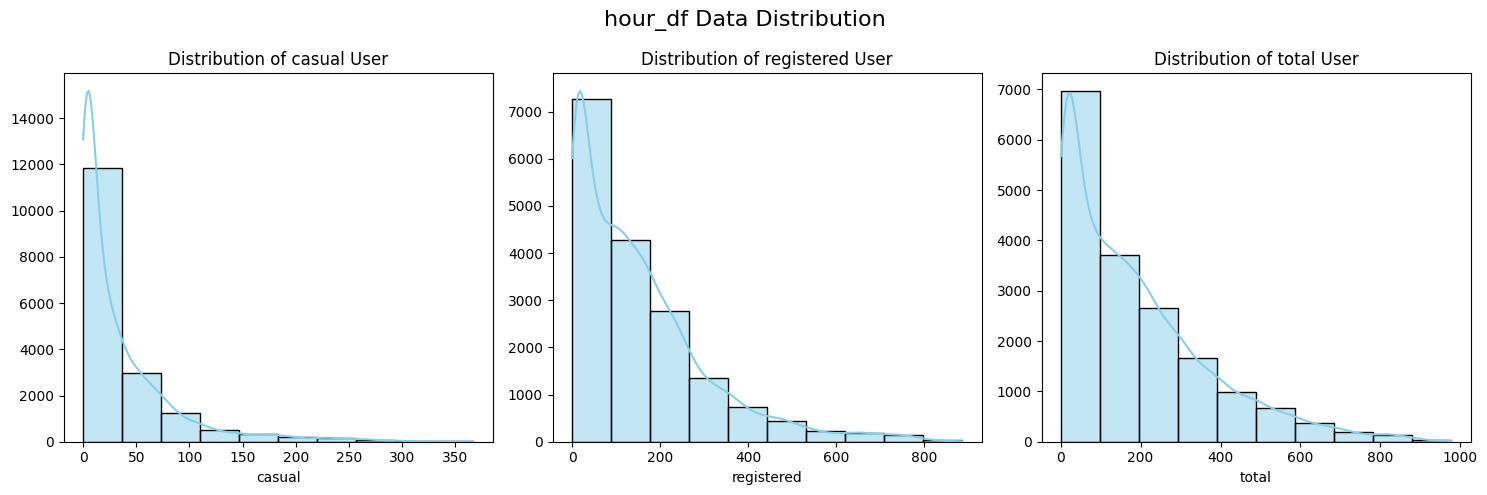

In [26]:
# Memeriksa distribusi pengguna casual, registered, dan total

# Buat list dataframe dan kolom
df_list = [day_df, hour_df]
df_name = ['day_df', 'hour_df']
col_list = ['casual', 'registered', 'total']

# Lakukan loop pada setiap dataframe
for df, name in zip(df_list, df_name):

    # Persiapkan kanvas figur
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
    
    # Buat histogram menggunakan seaborn
    for i, col in enumerate(col_list):
        sns.histplot(data=df, x=col, bins=10, kde=True, color='skyblue', ax=axs[i])
        axs[i].set_ylabel(None)
        axs[i].set_title(f"Distribution of {col} User")
    
    # Terapkan suptitle untuk setiap dataframe
    plt.suptitle(f"{name} Data Distribution", fontsize=16)
    plt.tight_layout()
    plt.show()

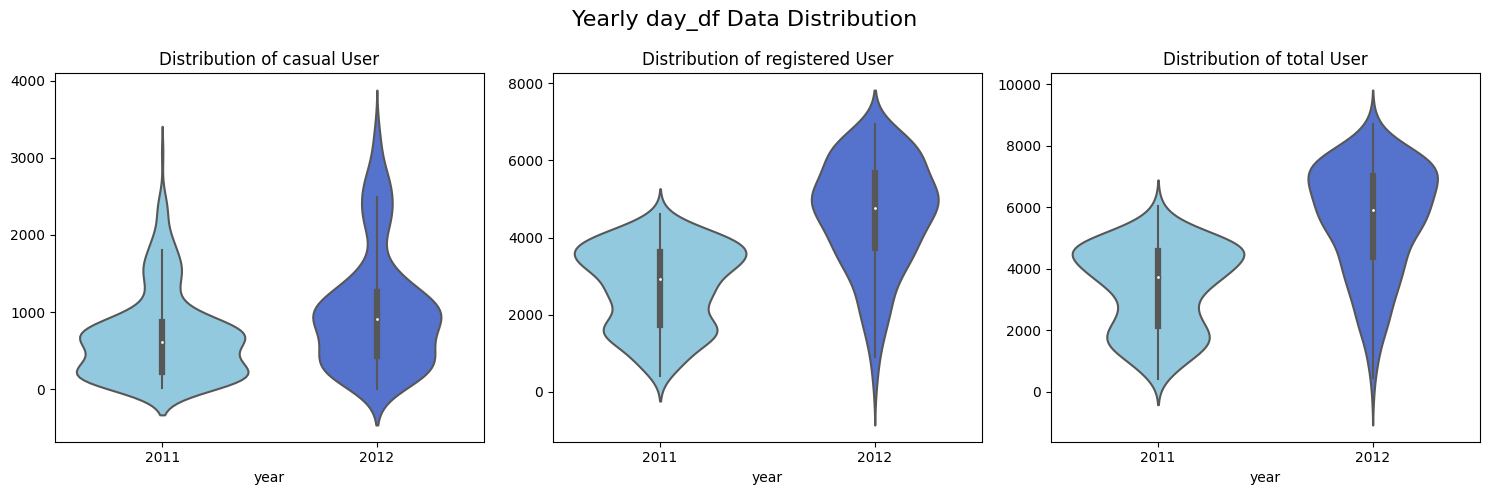

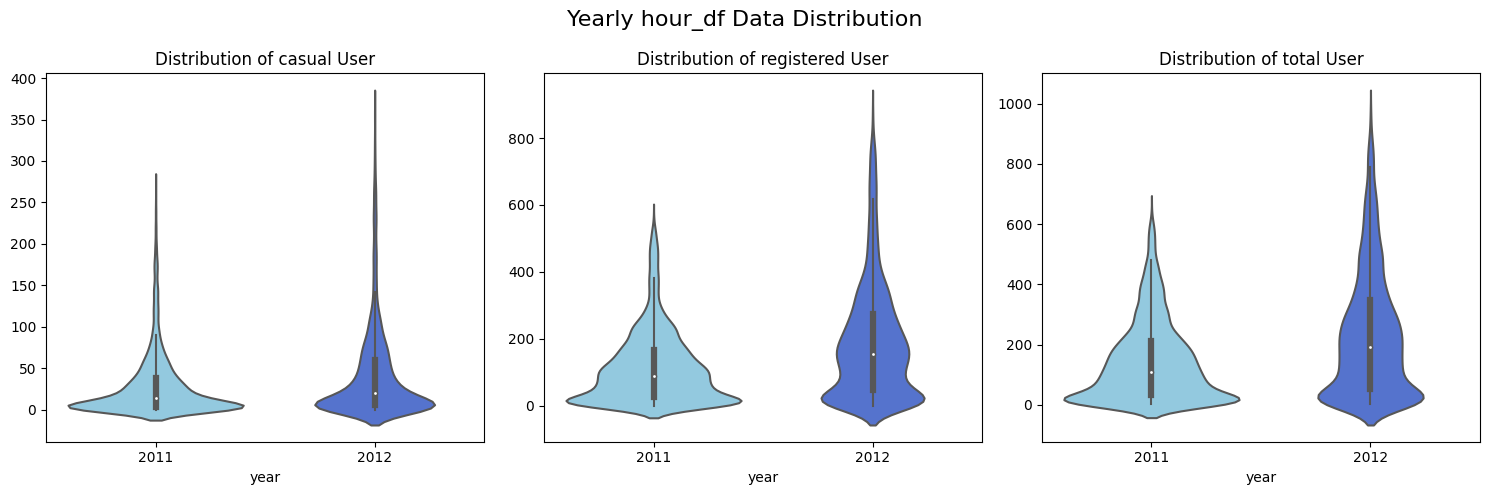

In [27]:
# Memeriksa distribusi pengguna casual, registered, dan total

# Buat list dataframe dan kolom
df_list = [day_df, hour_df]
df_name = ['day_df', 'hour_df']
col_list = ['casual', 'registered', 'total']

# Lakukan loop pada setiap dataframe
for df, name in zip(df_list, df_name):

    # Persiapkan kanvas figur
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
    
    # Buat violinplot menggunakan seaborn
    for i, col in enumerate(col_list):
        sns.violinplot(data=df, x='year', y=col, palette=['skyblue', 'royalblue'], ax=axs[i])
        axs[i].set_ylabel(None)
        axs[i].set_title(f"Distribution of {col} User")
    
    # Terapkan suptitle untuk setiap dataframe
    plt.suptitle(f"Yearly {name} Data Distribution", fontsize=16)
    plt.tight_layout()
    plt.show()

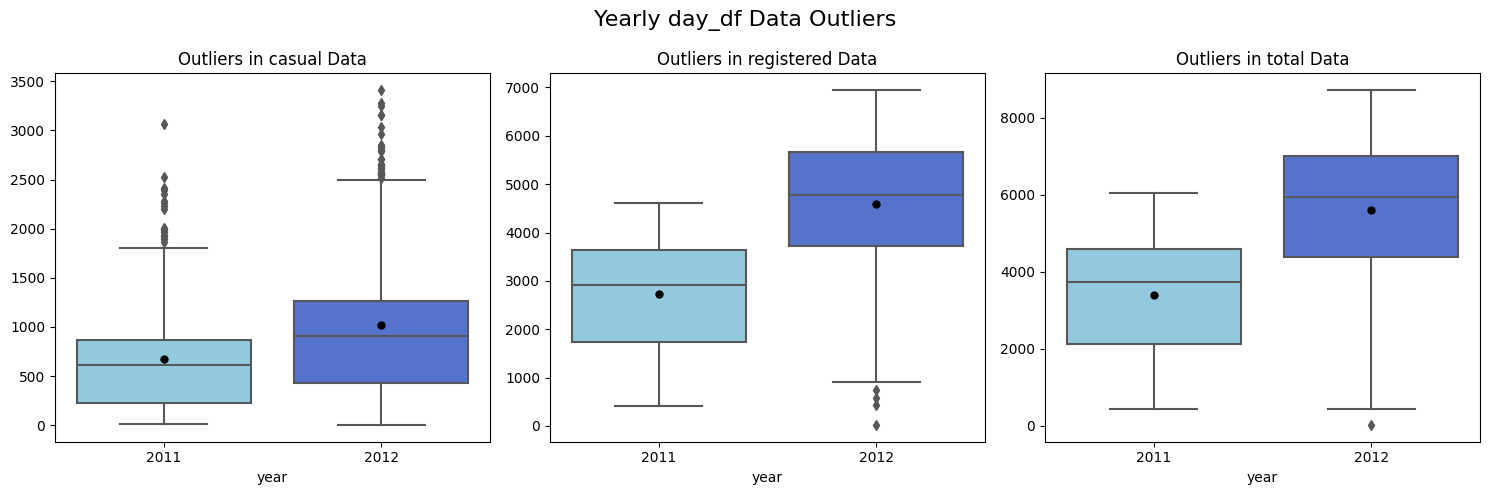

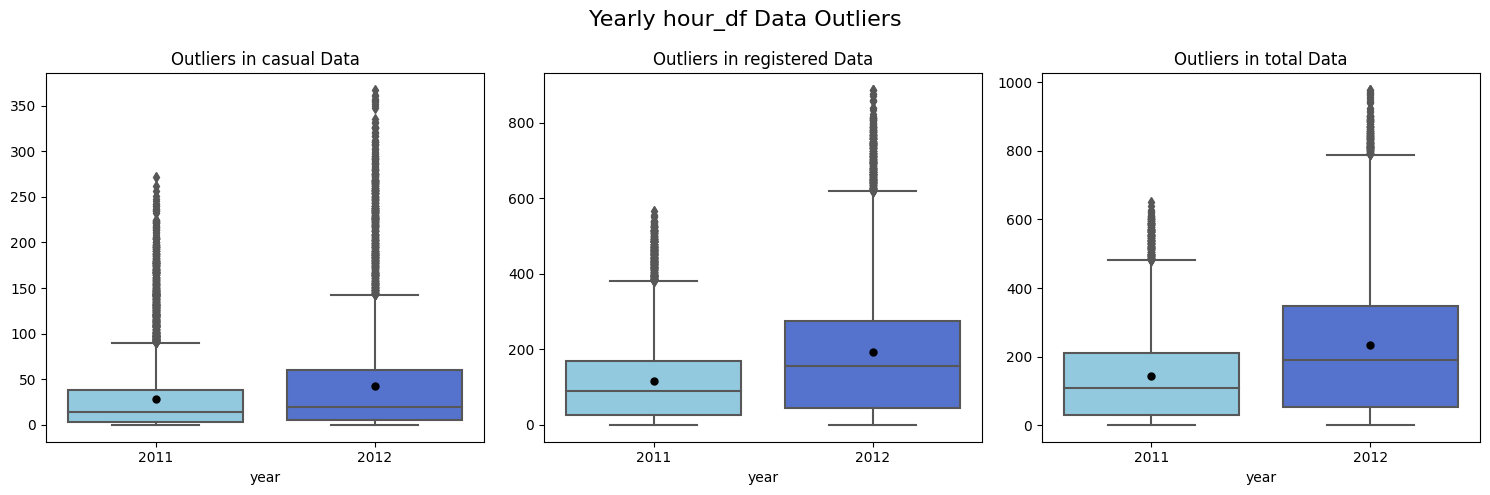

In [28]:
# Lihat keberadaan outliers menggunakan boxplot

# Buat list dataframe dan kolom
df_list = [day_df, hour_df]
df_name = ['day_df', 'hour_df']
col_list = ['casual', 'registered', 'total']

# Lakukan loop pada setiap dataframe
for df, name in zip(df_list, df_name):

    # Persiapkan kanvas figur
    fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
    
    # Buat violinplot menggunakan seaborn
    for i, col in enumerate(col_list):
        sns.boxplot(data=df, 
                    x='year', y=col, 
                    palette=['skyblue', 'royalblue'],
                    showmeans=True,                             # Menunjukan titik mean di dalam boxplot
                    meanprops= {'marker':'o',
                                'markerfacecolor':'black',
                                'markeredgecolor':'black',
                                'markersize':'5'}, 
                    ax=axs[i])
        axs[i].set_ylabel(None)
        axs[i].set_title(f"Outliers in {col} Data")
    
    # Terapkan suptitle untuk setiap dataframe
    plt.suptitle(f"Yearly {name} Data Outliers", fontsize=16)
    plt.tight_layout()
    plt.show()

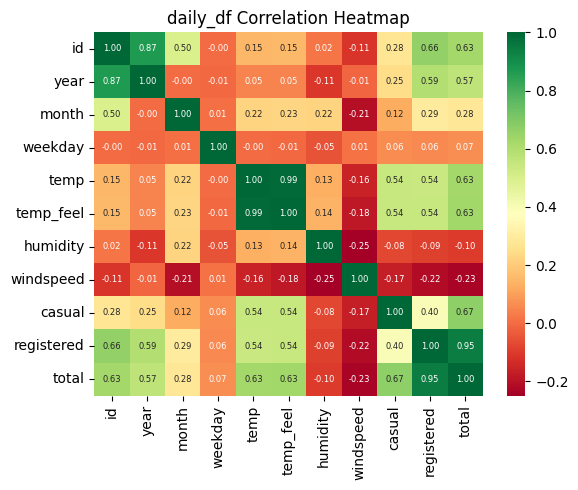

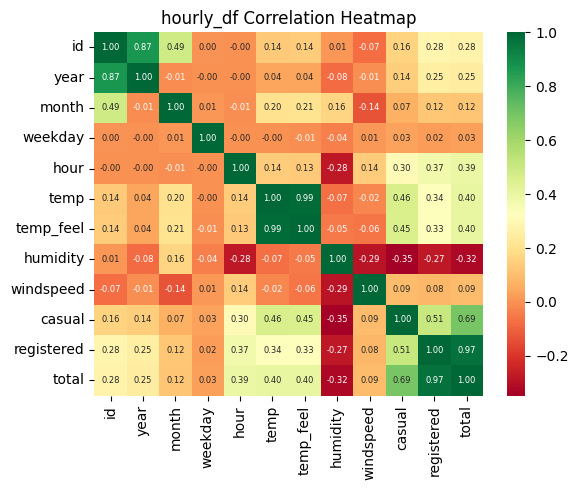

In [29]:
# Buat korelasi heatmap untuk kedua dataframe
daily_corr = day_df.corr()
hourly_corr = hour_df.corr()

# Buat list dataframe
df_corr = [daily_corr, hourly_corr]
df_name = ['daily_df', 'hourly_df']

# Buat heatmap menggunakan seaborn
for df, name in zip(df_corr, df_name):
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(data=df, 
                annot=True, 
                annot_kws={'fontsize':6}, 
                fmt='.2f', 
                cmap='RdYlGn')
                
    plt.title(f"{name} Correlation Heatmap")
    plt.tight_layout()
    plt.show()



### Explore Analysis `daily_df`

In [30]:
# Hitung jumlah pengguna sepeda tahunan
total_user_yearly = day_df.groupby('year').agg({'casual': ['sum', 'mean', 'median'],
                                                'registered': ['sum', 'mean', 'median'],
                                                'total': ['sum', 'mean', 'median']
                                                })

# Format angka dengan separator koma menggunakan applymap()
total_user_yearly = total_user_yearly.applymap(lambda x: f'{x:,.0f}')

total_user_yearly

casual               registered                    total              
          sum   mean median        sum   mean median        sum   mean median
year                                                                         
2011  247,252    677    614    995,851  2,728  2,915  1,243,103  3,406  3,740
2012  372,765  1,018    904  1,676,811  4,581  4,776  2,049,576  5,600  5,927

In [31]:
# Hitung jumlah pengguna sepeda bulanan
total_user_monthly = day_df.groupby(['year', 'month']).agg({'casual': ['sum', 'mean', 'median'],
                                                            'registered': ['sum', 'mean', 'median'],
                                                            'total': ['sum', 'mean', 'median']
                                                            })

# Format angka dengan separator koma menggunakan applymap()
total_user_monthly = total_user_monthly.applymap(lambda x: f'{x:,.0f}')

total_user_monthly

casual               registered                  total         \
               sum   mean median        sum   mean median      sum   mean   
year month                                                                  
2011 1       3,073     99     83     35,116  1,133  1,137   38,189  1,232   
     2       6,242    223    140     41,973  1,499  1,490   48,215  1,722   
     3      12,826    414    300     51,219  1,652  1,699   64,045  2,066   
     4      22,346    745    656     72,524  2,417  2,482   94,870  3,162   
     5      31,050  1,002    773    104,771  3,380  3,445  135,821  4,381   
     6      30,612  1,020    832    112,900  3,763  3,850  143,512  4,784   
     7      36,452  1,176    841    104,889  3,384  3,363  141,341  4,559   
     8      28,842    930    812    107,849  3,479  3,695  136,691  4,409   
     9      26,545    885    690    100,873  3,362  3,530  127,418  4,247   
     10     25,222    814    637     98,289  3,171  3,293  123,511  3,984   
     11     15,594    520    393     86,573  2,886  2,805  102,167  3,406   
     12      8,448    273    227     78,875  2,544  2,688   87,323  2,817   
2012 1       8,969    289    217     87,775  2,831  3,040   96,744  3,121   
     2       8,721    301    229     94,416  3,256  3,571  103,137  3,556   
     3      31,618  1,020    838    133,257  4,299  4,571  164,875  5,319   
     4      38,456  1,282  1,089    135,768  4,526  4,704  174,224  5,807   
     5      44,235  1,427  1,059    151,630  4,891  4,990  195,865  6,318   
     6      43,294  1,443  1,077    159,536  5,318  5,332  202,830  6,761   
     7      41,705  1,345  1,140    161,902  5,223  5,336  203,607  6,568   
     8      43,197  1,393  1,233    171,306  5,526  5,917  214,503  6,919   
     9      43,778  1,459  1,062    174,795  5,826  6,138  218,573  7,286   
     10     34,538  1,114    874    164,303  5,300  5,791  198,841  6,414   
     11     21,009    700    475    131,655  4,388  4,816  152,664  5,089   
     12     13,245    427    364    110,468  3,563  4,240  123,713  3,991   

                   
           median  
year month         
2011 1      1,248  
     2      1,629  
     3      2,077  
     4      3,226  
     5      4,451  
     6      4,840  
     7      4,541  
     8      4,602  
     9      4,584  
     10     4,304  
     11     3,631  
     12     3,068  
2012 1      3,243  
     2      3,777  
     3      5,382  
     4      6,214  
     5      6,421  
     6      6,988  
     7      6,685  
     8      7,148  
     9      7,514  
     10     7,282  
     11     5,319  
     12     4,649

In [32]:
# Hitung jumlah pengguna sepeda harian
total_user_daily = daily_df.groupby(['year', 'weekday', 'day_name']).agg({'casual': ['sum', 'mean', 'median'],
                                                                        'registered': ['sum', 'mean', 'median'],
                                                                        'total': ['sum', 'mean', 'median']
                                                                        })

# Format angka dengan separator koma menggunakan applymap()
total_user_daily = total_user_daily.applymap(lambda x: f'{x:,.0f}')

total_user_daily

casual               registered                  total  \
                          sum   mean median        sum   mean median      sum   
year weekday day_name                                                           
2011 0       Sun       59,603  1,146  1,218    117,471  2,259  2,464  177,074   
             Mon            0    nan    nan          0    nan    nan        0   
             Tue            0    nan    nan          0    nan    nan        0   
             Wed            0    nan    nan          0    nan    nan        0   
             Thu            0    nan    nan          0    nan    nan        0   
             Fri            0    nan    nan          0    nan    nan        0   
             Sat            0    nan    nan          0    nan    nan        0   
     1       Sun            0    nan    nan          0    nan    nan        0   
             Mon       31,560    607    671    148,661  2,859  3,286  180,221   
             Tue            0    nan    nan          0    nan    nan        0   
             Wed            0    nan    nan          0    nan    nan        0   
             Thu            0    nan    nan          0    nan    nan        0   
             Fri            0    nan    nan          0    nan    nan        0   
             Sat            0    nan    nan          0    nan    nan        0   
     2       Sun            0    nan    nan          0    nan    nan        0   
             Mon            0    nan    nan          0    nan    nan        0   
             Tue       23,989    461    454    156,349  3,007  3,565  180,338   
             Wed            0    nan    nan          0    nan    nan        0   
             Thu            0    nan    nan          0    nan    nan        0   
             Fri            0    nan    nan          0    nan    nan        0   
             Sat            0    nan    nan          0    nan    nan        0   
     3       Sun            0    nan    nan          0    nan    nan        0   
             Mon            0    nan    nan          0    nan    nan        0   
             Tue            0    nan    nan          0    nan    nan        0   
             Wed       20,660    397    346    148,509  2,856  3,322  169,169   
             Thu            0    nan    nan          0    nan    nan        0   
             Fri            0    nan    nan          0    nan    nan        0   
             Sat            0    nan    nan          0    nan    nan        0   
     4       Sun            0    nan    nan          0    nan    nan        0   
             Mon            0    nan    nan          0    nan    nan        0   
             Tue            0    nan    nan          0    nan    nan        0   
             Wed            0    nan    nan          0    nan    nan        0   
             Thu       22,440    432    453    152,112  2,925  3,169  174,552   
             Fri            0    nan    nan          0    nan    nan        0   
             Sat            0    nan    nan          0    nan    nan        0   
     5       Sun            0    nan    nan          0    nan    nan        0   
             Mon            0    nan    nan          0    nan    nan        0   
             Tue            0    nan    nan          0    nan    nan        0   
             Wed            0    nan    nan          0    nan    nan        0   
             Thu            0    nan    nan          0    nan    nan        0   
             Fri       29,453    566    570    152,553  2,934  3,234  182,006   
             Sat            0    nan    nan          0    nan    nan        0   
     6       Sun            0    nan    nan          0    nan    nan        0   
             Mon            0    nan    nan          0    nan    nan        0   
             Tue            0    nan    nan          0    nan    nan        0   
             Wed            0    nan    nan          0    nan    nan        0   
             Thu            0    nan    nan          0

In [33]:
# Hitung jumlah pengguna sepeda berdasarkan tipe hari
total_user_dayt = daily_df.groupby(['year', 'day_type']).agg({'day_type': 'count', 
                                                              'casual': ['sum', 'mean', 'median'],
                                                              'registered': ['sum', 'mean', 'median'],
                                                              'total': ['sum', 'mean', 'median']
                                                              })

# Format angka dengan separator koma menggunakan applymap()
total_user_dayt  = total_user_dayt.applymap(lambda x: f'{x:,.0f}')

total_user_dayt

day_type   casual               registered                \
                    count      sum   mean median        sum   mean median   
year day_type                                                               
2011 Holiday           10    9,748    975    601     20,274  2,027  2,300   
     Weekend          105  119,150  1,135  1,188    237,667  2,263  2,487   
     Working Day      250  118,354    473    474    737,910  2,952  3,322   
2012 Holiday           11   12,611  1,146    955     35,802  3,255  3,486   
     Weekend          105  175,223  1,669  1,829    389,794  3,712  3,934   
     Working Day      250  184,931    740    779  1,251,215  5,005  5,184   

                      total                
                        sum   mean median  
year day_type                              
2011 Holiday         30,022  3,002  3,238  
     Weekend        356,817  3,398  3,649  
     Working Day    856,264  3,425  3,794  
2012 Holiday         48,413  4,401  5,478  
     Weekend        565,017  5,381  5,810  
     Working Day  1,436,146  5,745  5,989

In [34]:
# Hitung jumlah pengguna sepeda berdasarkan musim 
total_user_season = day_df.groupby(['year', 'season']).agg({'casual': ['sum', 'mean', 'median'],
                                                            'registered': ['sum', 'mean', 'median'],
                                                            'total': ['sum', 'mean', 'median']
                                                            })

# Format angka dengan separator koma menggunakan applymap()
total_user_season = total_user_season.applymap(lambda x: f'{x:,.0f}')

total_user_season

casual               registered                  total         \
                 sum   mean median        sum   mean median      sum   mean   
year season                                                                   
2011 Fall     95,450  1,015    800    324,200  3,449  3,594  419,650  4,464   
     Spring   21,425    238    140    128,575  1,429  1,454  150,000  1,667   
     Summer   77,564    843    730    269,752  2,932  3,203  347,316  3,775   
     Winter   52,813    593    456    273,324  3,071  3,240  326,137  3,664   
2012 Fall    130,641  1,390  1,197    510,838  5,434  5,670  641,479  6,824   
     Spring   39,197    431    269    282,151  3,101  3,162  321,348  3,531   
     Summer  125,958  1,369  1,064    445,315  4,840  4,948  571,273  6,209   
     Winter   76,969    865    753    438,507  4,927  5,080  515,476  5,792   

                    
            median  
year season         
2011 Fall    4,616  
     Spring  1,602  
     Summer  4,086  
     Winter  3,717  
2012 Fall    6,942  
     Spring  3,456  
     Summer  6,384  
     Winter  5,629

In [35]:
# Hitung jumlah pengguna sepeda berdasarkan kondisi cuaca tahunan
total_user_weather = day_df.groupby(['year', 'weather']).agg({'casual': ['sum', 'mean', 'median'],
                                                              'registered': ['sum', 'mean', 'median'],
                                                              'total': ['sum', 'mean', 'median']
                                                              })

# Format angka dengan separator koma menggunakan applymap()
total_user_weather = total_user_weather.applymap(lambda x: f'{x:,.0f}')

total_user_weather

casual         \
                                                             sum   mean   
year weather                                                              
2011 Clear, Few clouds, Partly cloudy                    177,272    784   
     Light Snow, Light Rain + Thunderstorm + Scatter...    1,993    133   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...   67,987    548   
2012 Clear, Few clouds, Partly cloudy                    269,074  1,135   
     Light Snow, Light Rain + Thunderstorm + Scatter...    1,902    317   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  101,789    828   

                                                               registered  \
                                                        median        sum   
year weather                                                                
2011 Clear, Few clouds, Partly cloudy                      697    657,795   
     Light Snow, Light Rain + Thunderstorm + Scatter...    126     23,119   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...    436    314,937   
2012 Clear, Few clouds, Partly cloudy                    1,001  1,153,811   
     Light Snow, Light Rain + Thunderstorm + Scatter...    156     10,855   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...    653    512,145   

                                                                       \
                                                          mean median   
year weather                                                            
2011 Clear, Few clouds, Partly cloudy                    2,911  3,173   
     Light Snow, Light Rain + Thunderstorm + Scatter...  1,541  1,672   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  2,540  2,634   
2012 Clear, Few clouds, Partly cloudy                    4,868  5,062   
     Light Snow, Light Rain + Thunderstorm + Scatter...  1,809  1,442   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  4,164  4,224   

                                                             total         \
                                                               sum   mean   
year weather                                                                
2011 Clear, Few clouds, Partly cloudy                      835,067  3,695   
     Light Snow, Light Rain + Thunderstorm + Scatter...     25,112  1,674   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...    382,924  3,088   
2012 Clear, Few clouds, Partly cloudy                    1,422,885  6,004   
     Light Snow, Light Rain + Thunderstorm + Scatter...     12,757  2,126   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...    613,934  4,991   

                                                                
                                                        median  
year weather                                                    
2011 Clear, Few clouds, Partly cloudy                    4,104  
     Light Snow, Light Rain + Thunderstorm + Scatter...  1,817  
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  3,380  
2012 Clear, Few clouds, Partly cloudy                    6,398  
     Light Snow, Light Rain + Thunderstorm + Scatter...  1,598  
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  5,191

In [36]:
# Hitung jumlah pengguna sepeda berdasarkan kondisi cuaca bulanan
total_user_mweather = day_df.groupby(['year', 'month', 'weather']).agg({'casual': ['sum', 'mean', 'median'],
                                                                        'registered': ['sum', 'mean', 'median'],
                                                                        'total': ['sum', 'mean', 'median']
                                                                        })

# Format angka dengan separator koma menggunakan applymap()
total_user_mweather = total_user_mweather.applymap(lambda x: f'{x:,.0f}')

total_user_mweather

casual         \
                                                                  sum   mean   
year month weather                                                             
2011 1     Clear, Few clouds, Partly cloudy                     1,543     91   
           Light Snow, Light Rain + Thunderstorm + Scatter...      34     34   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   1,496    115   
     2     Clear, Few clouds, Partly cloudy                     5,386    283   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...     856     95   
     3     Clear, Few clouds, Partly cloudy                     9,175    540   
           Light Snow, Light Rain + Thunderstorm + Scatter...     225    112   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   3,426    286   
     4     Clear, Few clouds, Partly cloudy                    12,419    887   
           Light Snow, Light Rain + Thunderstorm + Scatter...     121    121   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   9,806    654   
     5     Clear, Few clouds, Partly cloudy                    21,587  1,136   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   9,463    789   
     6     Clear, Few clouds, Partly cloudy                    22,594  1,076   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   8,018    891   
     7     Clear, Few clouds, Partly cloudy                    29,781  1,103   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   6,671  1,668   
     8     Clear, Few clouds, Partly cloudy                    21,755    946   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   7,087    886   
     9     Clear, Few clouds, Partly cloudy                    13,496  1,227   
           Light Snow, Light Rain + Thunderstorm + Scatter...     475    158   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...  12,574    786   
     10    Clear, Few clouds, Partly cloudy                    20,045  1,114   
           Light Snow, Light Rain + Thunderstorm + Scatter...     528    176   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   4,649    465   
     11    Clear, Few clouds, Partly cloudy                    12,917    646   
           Light Snow, Light Rain + Thunderstorm + Scatter...     434    145   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   2,243    320   
     12    Clear, Few clouds, Partly cloudy                     6,574    329   
           Light Snow, Light Rain + Thunderstorm + Scatter...     176     88   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   1,698    189   
2012 1     Clear, Few clouds, Partly cloudy                     7,244    362   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   1,725    157   
     2     Clear, Few clouds, Partly cloudy                     6,163    342   
           Light Snow, Light Rain + Thunderstorm + Scatter...     192    192   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   2,366    237   
     3     Clear, Few clouds, Partly cloudy                    14,806    779   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...  16,812  1,401   
     4     Clear, Few clouds, Partly cloudy                    33,187  1,443   
           Light Snow, Light Rain + Thunderstorm + Scatter...     120    120   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   5,149    858   
     5     Clear, Few clouds, Partly cloudy                    31,894  1,772   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...  12,341    949   
     6     Clear, Few clouds, Partly cloudy                    39,646  1,586   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...   3,648    730   
     7     Clear, Few clouds, Partly cloudy                    31,332  1,306   
           Light Snow, Light Rain + Thunderstorm + Scatter...   1,264  1,264   
           Mist + Cloudy, Mist + Broken clouds, Mist + Few...  

### Explore Analysis `hourly_df`

In [37]:
# Hitung jumlah pengguna sepeda berdasarkan kondisi cuaca tahunan
total_user_weather_comp = hour_df.groupby(['year', 'weather']).agg({'hour': 'count',
                                                                    'casual': ['sum', 'mean', 'median'],
                                                                    'registered': ['sum', 'mean', 'median'],
                                                                    'total': ['sum', 'mean', 'median']
                                                                    })

# Format angka dengan separator koma menggunakan applymap()
total_user_weather_comp = total_user_weather_comp.applymap(lambda x: f'{x:,.0f}')

total_user_weather_comp

hour   casual       \
                                                         count      sum mean   
year weather                                                                   
2011 Clear, Few clouds, Partly cloudy                    5,645  183,733   33   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      1        1    1   
     Light Snow, Light Rain + Thunderstorm + Scatter...    781    9,709   12   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  2,218   53,809   24   
2012 Clear, Few clouds, Partly cloudy                    5,768  279,012   48   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      2        7    4   
     Light Snow, Light Rain + Thunderstorm + Scatter...    638   13,074   20   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  2,326   80,672   35   

                                                               registered  \
                                                        median        sum   
year weather                                                                
2011 Clear, Few clouds, Partly cloudy                       17    691,320   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      1         35   
     Light Snow, Light Rain + Thunderstorm + Scatter...      4     57,786   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...     13    246,710   
2012 Clear, Few clouds, Partly cloudy                       25  1,184,108   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      4        180   
     Light Snow, Light Rain + Thunderstorm + Scatter...      7     77,762   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...     17    414,761   

                                                                     \
                                                        mean median   
year weather                                                          
2011 Clear, Few clouds, Partly cloudy                    122     98   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   35     35   
     Light Snow, Light Rain + Thunderstorm + Scatter...   74     44   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  111     86   
2012 Clear, Few clouds, Partly cloudy                    205    170   
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   90     90   
     Light Snow, Light Rain + Thunderstorm + Scatter...  122     76   
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...  178    146   

                                                             total              
                                                               sum mean median  
year weather                                                                    
2011 Clear, Few clouds, Partly cloudy                      875,053  155    122  
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...         36   36     36  
     Light Snow, Light Rain + Thunderstorm + Scatter...     67,495   86     50  
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...    300,519  135    106  
2012 Clear, Few clouds, Partly cloudy                    1,463,120  254    212  
     Heavy Rain + Ice Pallets + Thunderstorm + Mist,...        187   94     94  
     Light Snow, Light Rain + Thunderstorm + Scatter...     90,836  142     90  
     Mist + Cloudy, Mist + Broken clouds, Mist + Few...    495,433  213    174

In [38]:
# Hitung jumlah pengguna sepeda per jam
total_user_hour = hour_df.groupby('hour').agg({'hour': 'count',
                                                              'casual': ['sum', 'mean', 'median'],
                                                              'registered': ['sum', 'mean', 'median'],
                                                              'total': ['sum', 'mean', 'median']
                                                              })

# Format angka dengan separator koma menggunakan applymap()
total_user_hour = total_user_hour.applymap(lambda x: f'{x:,.0f}')

total_user_hour

hour  casual             registered                total            
     count     sum mean median        sum mean median      sum mean median
hour                                                                      
0      726   7,375   10      7     31,755   44     32   39,130   54     40
1      724   4,709    7      4     19,455   27     15   24,164   33     20
2      715   3,412    5      2     12,940   18      8   16,352   23     11
3      697   1,893    3      1      6,281    9      5    8,174   12      6
4      697     874    1      1      3,554    5      5    4,428    6      6
5      717   1,012    1      1     13,249   18     17   14,261   20     19
6      725   3,017    4      3     52,115   72     73   55,132   76     76
7      727   8,037   11     10    146,134  201    202  154,171  212    208
8      727  15,761   22     21    245,240  337    361  261,001  359    385
9      727  22,458   31     26    136,980  188    180  159,438  219    216
10     727  33,789   46     34     92,468  127    115  126,257  174    147
11     727  43,286   60     44    108,034  149    136  151,320  208    180
12     728  49,718   68     49    134,696  185    180  184,414  253    229
13     729  52,713   72     50    132,206  181    175  184,919  254    224
14     729  55,089   76     53    120,563  165    155  175,652  241    212
15     729  54,606   75     54    128,543  176    170  183,149  251    227
16     730  53,834   74     55    173,914  238    242  227,748  312    304
17     730  54,220   74     64    282,640  387    372  336,860  461    475
18     728  44,496   61     55    265,276  364    348  309,772  426    418
19     728  35,505   49     40    191,284  263    255  226,789  312    310
20     728  26,378   36     29    138,172  190    186  164,550  226    224
21     728  20,570   28     22    104,875  144    145  125,445  172    174
22     728  16,200   22     18     79,412  109    106   95,612  131    129
23     728  11,065   15     12     52,876   73     66   63,941   88     80

In [39]:
# Hitung jumlah pengguna sepeda per jam per tahun
total_user_hour_year = hour_df.groupby(['year', 'hour']).agg({'hour': 'count',
                                                              'casual': ['sum', 'mean', 'median'],
                                                              'registered': ['sum', 'mean', 'median'],
                                                              'total': ['sum', 'mean', 'median']
                                                              })

# Format angka dengan separator koma menggunakan applymap()
total_user_hour_year = total_user_hour_year.applymap(lambda x: f'{x:,.0f}')

total_user_hour_year

hour  casual             registered                total       \
          count     sum mean median        sum mean median      sum mean   
year hour                                                                  
2011 0      361   3,423    9      6     12,117   34     25   15,540   43   
     1      360   2,071    6      4      7,487   21     12    9,558   27   
     2      352   1,570    4      2      5,091   14      7    6,661   19   
     3      342     954    3      1      2,487    7      4    3,441   10   
     4      337     431    1      1      1,386    4      4    1,817    5   
     5      353     428    1      1      4,729   13     12    5,157   15   
     6      361   1,377    4      3     19,424   54     44   20,801   58   
     7      363   3,768   10      9     53,162  146    112   56,930  157   
     8      363   6,969   19     19     88,498  244    244   95,467  263   
     9      363   8,864   24     21     50,622  139    149   59,486  164   
     10     363  13,065   36     28     34,446   95     89   47,511  131   
     11     363  16,582   46     33     40,016  110    104   56,598  156   
     12     364  19,006   52     38     50,192  138    139   69,198  190   
     13     364  20,152   55     37     49,187  135    136   69,339  190   
     14     364  21,097   58     41     45,385  125    117   66,482  183   
     15     364  20,863   57     40     47,727  131    127   68,590  188   
     16     365  20,739   57     42     64,883  178    193   85,622  235   
     17     365  21,473   59     53    106,159  291    245  127,632  350   
     18     363  18,066   50     44     98,919  273    238  116,985  322   
     19     363  14,525   40     33     71,277  196    189   85,802  236   
     20     363  10,960   30     24     51,858  143    138   62,818  173   
     21     363   8,845   24     18     40,030  110    113   48,875  135   
     22     363   7,031   19     14     30,646   84     88   37,677  104   
     23     363   4,993   14     11     20,123   55     53   25,116   69   
2012 0      365   3,952   11      8     19,638   54     43   23,590   65   
     1      364   2,638    7      4     11,968   33     19   14,606   40   
     2      363   1,842    5      2      7,849   22     10    9,691   27   
     3      355     939    3      1      3,794   11      6    4,733   13   
     4      360     443    1      0      2,168    6      6    2,611    7   
     5      364     584    2      1      8,520   23     24    9,104   25   
     6      364   1,640    5      4     32,691   90     98   34,331   94   
     7      364   4,269   12     10     92,972  255    282   97,241  267   
     8      364   8,792   24     24    156,742  431    538  165,534  455   
     9      364  13,594   37     31     86,358  237    258   99,952  275   
     10     364  20,724   57     44     58,022  159    146   78,746  216   
     11     364  26,704   73     57     68,018  187    168   94,722  260   
     12     364  30,712   84     63     84,504  232    220  115,216  317   
     13     365  32,561   89     68     83,019  227    216  115,580  317   
     14     365  33,992   93     67     75,178  206    188  109,170  299   
     15     365  33,743   92     69     80,816  221    213  114,559  314   
     16     365  33,095   91     70    109,031  299    316  142,126  389   
     17     365  32,747   90     83    176,481  484    508  209,228  573   
     18     365  26,430   72     69    166,357  456    477  192,787  528   
     19     365  20,980   57     50    120,007  329    329  140,987  386   
     20     365  15,418   42     35     86,314  236    235  101,732  279   
     21     365  11,725   32     26     64,845  178    180   76,570  210   
     22     365   9,169   25     19     48,766  134    134   57,935  159   
     23     365   6,072   17     12     32,753   90     84   38,825  106   

                  
          median  
year hour         
2011 0        32  
     1        16  
     2        10  
     3         6  
 

In [40]:
# Hitung jumlah pengguna sepeda per jam per musim
total_user_hour_season = hour_df.groupby(['season', 'hour']).agg({'hour': 'count',
                                                                  'casual': ['sum', 'mean', 'median'],
                                                                  'registered': ['sum', 'mean', 'median'],
                                                                  'total': ['sum', 'mean', 'median']
                                                                  })

# Format angka dengan separator koma menggunakan applymap()
total_user_hour_season = total_user_hour_season.applymap(lambda x: f'{x:,.0f}')

total_user_hour_season

hour  casual             registered                total       \
            count     sum mean median        sum mean median      sum mean   
season hour                                                                  
Fall   0      187   3,093   17     13     10,729   57     46   13,822   74   
       1      186   1,795   10      7      6,337   34     19    8,132   44   
       2      186   1,312    7      3      4,404   24     10    5,716   31   
       3      186     747    4      2      2,183   12      6    2,930   16   
       4      187     322    2      1      1,219    7      6    1,541    8   
       5      187     493    3      2      4,454   24     23    4,947   26   
       6      187   1,247    7      6     17,699   95    102   18,946  101   
       7      188   3,192   17     17     48,808  260    288   52,000  277   
       8      188   6,094   32     32     73,110  389    397   79,204  421   
       9      188   8,383   45     40     39,544  210    189   47,927  255   
       10     188  12,398   66     56     28,007  149    137   40,405  215   
       11     188  15,114   80     65     32,205  171    156   47,319  252   
       12     188  16,872   90     72     39,586  211    206   56,458  300   
       13     188  17,379   92     72     38,277  204    194   55,656  296   
       14     188  17,829   95     76     35,231  187    176   53,060  282   
       15     188  17,337   92     71     36,884  196    194   54,221  288   
       16     188  17,821   95     78     51,695  275    262   69,516  370   
       17     188  19,245  102     91     88,317  470    468  107,562  572   
       18     187  17,181   92     86     85,149  455    454  102,330  547   
       19     187  15,374   82     78     63,009  337    317   78,383  419   
       20     187  11,754   63     58     46,751  250    243   58,505  313   
       21     187   9,229   49     46     35,918  192    186   45,147  241   
       22     187   7,141   38     34     27,275  146    137   34,416  184   
       23     187   4,739   25     22     18,247   98     94   22,986  123   
Spring 0      178     604    3      3      4,274   24     20    4,878   27   
       1      178     416    2      1      2,813   16      9    3,229   18   
       2      170     305    2      1      1,870   11      5    2,175   13   
       3      156     166    1      0        942    6      3    1,108    7   
       4      154      73    0      0        417    3      2      490    3   
       5      171      65    0      0      1,765   10      7    1,830   11   
       6      178     209    1      1      7,052   40     31    7,261   41   
       7      179     724    4      2     19,931  111     89   20,655  115   
       8      179   1,479    8      7     40,616  227    198   42,095  235   
       9      179   2,019   11      9     24,297  136    127   26,316  147   
       10     179   3,036   17     12     14,903   83     78   17,939  100   
       11     179   4,418   25     16     17,157   96     89   21,575  121   
       12     180   5,312   30     19     21,819  121    110   27,131  151   
       13     180   5,883   33     18     22,292  124    112   28,175  157   
       14     180   6,467   36     18     20,138  112    102   26,605  148   
       15     180   6,537   36     21     21,481  119    109   28,018  156   
       16     181   6,039   33     19     26,960  149    125   32,999  182   
       17     181   5,377   30     16     42,403  234    195   47,780  264   
       18     180   3,693   21     11     39,417  219    169   43,110  240   
       19     180   2,453   14      8     27,384  152    116   29,837  166   
       20     180   1,816   10      6     19,395  108     84   21,211  118   
       21     180   1,493    8      5     15,004   83     64   16,497   92   
       22     180   1,224    7      4     11,216   62     52   12,440   69   
       23     180     814    5      3      7,180   40     34    7,994   44   
Summer 0      184   2,282   12     

### Uji Hipotesis

Pada tahap ini, Saya akan melakukan uji statistik untuk melihat pengaruh `temp`, `temp_feel`, `humidity`, dan `windspeed` terhadap banyaknya penggunaan sepeda. 

Karena hour_df memiliki lebih dari 17 ribu baris data, Saya akan mengambil sampel sebanyak 376 baris data secara acak menggunakan *random sampling* dengan 95% confidence level dan 5% margin of error.

Penarikan kesimpulan uji regresi linier memperhatikan nilai-nilai berikut:
1. R-squared: digunakan untuk mengukur seberapa besar model linier dapat menjelaskan pengaruh (dalam persentase)
2. t-statistic: digunakan beriringan dengan p-value untuk menentukan signifikansi variabel x terhadap y (t-statistic > t-table)
3. p-value (P>|t|): digunakan beriringan dengan t-statistic untuk menentukan signifikansi variabel x terhadap y (p-value < 0.05)

Hipotesis untuk masing-masing parameter cuaca adalah sebagai berikut:
* ${H_0} (null): \text{Nilai (Parameter) tidak berpengaruh terhadap total pengguna}$
* ${H_1} (alternatif): \text{Nilai (Parameter) berpengaruh terhadap total pengguna}$

In [41]:
# Persiapkan uji statistik menggunakan statsmodels
import statsmodels.api as sm

#### Random Sampling

In [42]:
# Lakukan random sampling menggunakan fungsi sample()

# Definisikan besar sample
sample_size = 376

# Buat variabel baru yang memuat data sampel. Tetapkan angka random state untuk reproducibility
hour_sample = hour_df.sample(n=sample_size, random_state=42)

#### Pengaruh `temp` terhadap total pengguna

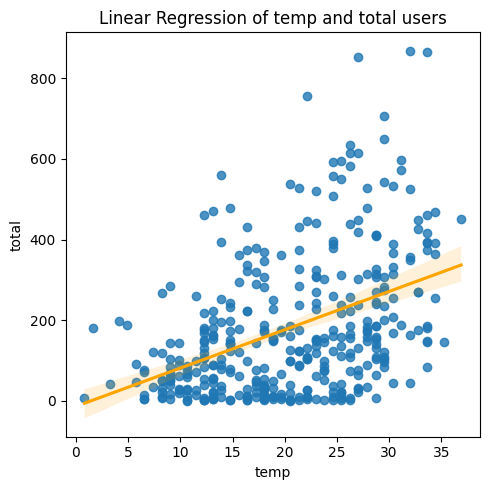

In [43]:
# Visualisasikan pengaruh temp menggunakan regplot() di seaborn
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(data=hour_sample, x='temp', y='total', line_kws={'color':'orange'}, fit_reg=True)
plt.title("Linear Regression of temp and total users")
plt.tight_layout()
plt.show() 

In [44]:
# Lakukan uji regresi linier menggunakan statsmodels

# Definisikan variabel dependen and independen
x = hour_sample.temp
x = sm.add_constant(x)
y = hour_sample.total

# Jalankan uji statistik dan buat ringkasan
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     82.71
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           5.68e-18
Time:                        19:31:13   Log-Likelihood:                -2432.1
No. Observations:                 376   AIC:                             4868.
Df Residuals:                     374   BIC:                             4876.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.4293     22.768     -0.590      0.5

#### Pengaruh `temp_feel` terhadap total pengguna

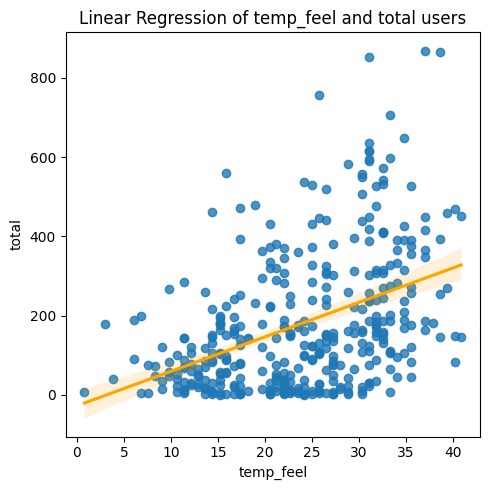

In [45]:
# Visualisasikan pengaruh temp_feel menggunakan regplot() di seaborn
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(data=hour_sample, x='temp_feel', y='total', line_kws={'color':'orange'}, fit_reg=True)
plt.title("Linear Regression of temp_feel and total users")
plt.tight_layout()
plt.show() 

In [46]:
# Lakukan uji regresi linier menggunakan statsmodels

# Definisikan variabel dependen and independen
x = hour_sample.temp_feel
x = sm.add_constant(x)
y = hour_sample.total

# Jalankan uji statistik dan buat ringkasan
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     81.37
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           9.91e-18
Time:                        19:31:14   Log-Likelihood:                -2432.7
No. Observations:                 376   AIC:                             4869.
Df Residuals:                     374   BIC:                             4877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.1757     24.367     -1.115      0.2

#### Pengaruh `humidity` terhadap total pengguna

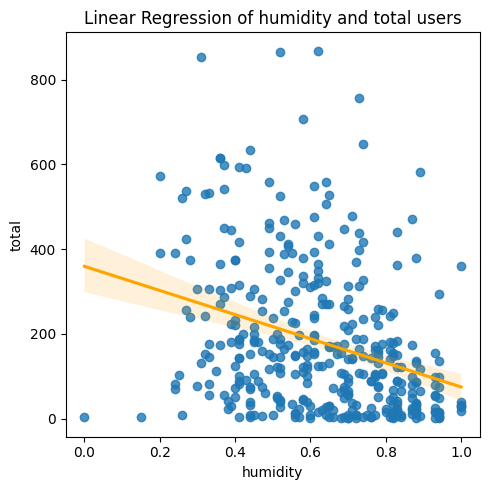

In [47]:
# Visualisasikan pengaruh humidity menggunakan regplot() di seaborn
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(data=hour_sample, x='humidity', y='total', line_kws={'color':'orange'}, fit_reg=True)
plt.title("Linear Regression of humidity and total users")
plt.tight_layout()
plt.show() 

In [48]:
# Lakukan uji regresi linier menggunakan statsmodels

# Definisikan variabel dependen and independen
x = hour_sample.humidity
x = sm.add_constant(x)
y = hour_sample.total

# Jalankan uji statistik dan buat ringkasan
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     42.45
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           2.34e-10
Time:                        19:31:14   Log-Likelihood:                -2449.5
No. Observations:                 376   AIC:                             4903.
Df Residuals:                     374   BIC:                             4911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        359.4239     28.772     12.492      0.0

#### Pengaruh `windspeed` terhadap total pengguna

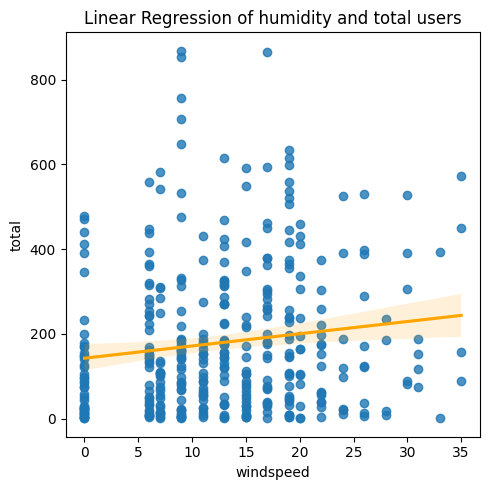

In [49]:
# Visualisasikan pengaruh windspeed menggunakan regplot() di seaborn
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(data=hour_sample, x='windspeed', y='total', line_kws={'color':'orange'}, fit_reg=True)
plt.title("Linear Regression of humidity and total users")
plt.tight_layout()
plt.show() 

In [50]:
# Lakukan uji regresi linier menggunakan statsmodels

# Definisikan variabel dependen and independen
x = hour_sample.windspeed
x = sm.add_constant(x)
y = hour_sample.total

# Jalankan uji statistik dan buat ringkasan
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     6.786
Date:                Tue, 19 Sep 2023   Prob (F-statistic):            0.00955
Time:                        19:31:15   Log-Likelihood:                -2466.3
No. Observations:                 376   AIC:                             4937.
Df Residuals:                     374   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.8598     16.841      8.483      0.0

#### Pengaruh gabungan parameter cuaca terhadap total pengguna

In [51]:
# Lakukan uji regresi berganda menggunakan statsmodels

# Definisikan variabel dependen and independen
x = hour_sample[['temp', 'humidity', 'windspeed']]
x = sm.add_constant(x)
y = hour_sample['total']

# Jalankan uji statistik dan buat ringkasan
lr = sm.OLS(y, x).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     47.09
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           8.05e-26
Time:                        19:31:15   Log-Likelihood:                -2409.2
No. Observations:                 376   AIC:                             4826.
Df Residuals:                     372   BIC:                             4842.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.8784     39.829      4.366      0.0

## Visualization & Explanatory Analysis

### 1. Bagaimana tren pengguna sepeda per bulan dari tahun 2011 sampai tahun 2012?

In [52]:
# Buat kolom baru untuk menyimpan data tanggal sesuai hierarki
hour_df['yearmonth'] = hour_df['year'].astype(str) + '-' + hour_df['month_name'].astype(str)
day_df['yearmonth'] = day_df['year'].astype(str) + '-' + day_df['month_name'].astype(str)

# Buat list yearmonth sesuai urutan
yearmonth_order = day_df.yearmonth.unique()
yearmonth_order = yearmonth_order.tolist()

# Buat list dataframe
df_list = [day_df, hour_df]

# Urutkan yearmonth berdasarkan urutannya
for df in df_list:
    df['yearmonth'] = pd.Categorical(df['yearmonth'], categories=yearmonth_order, ordered=True)

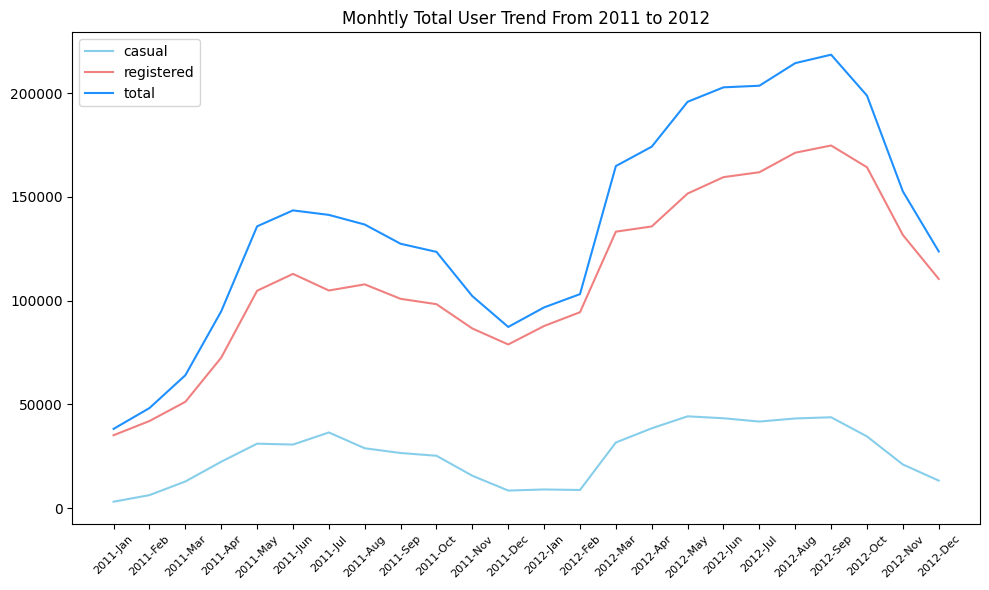

In [53]:
# Agregat data ke dalam variabel baru
trend_data = day_df.groupby('yearmonth')[['casual', 'registered', 'total']].sum().reset_index()

# Persiapkan kanvas figur
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# Buat lineplot menggunakan seaborn
sns.lineplot(data=trend_data, x='yearmonth', y='casual', color='skyblue', errorbar=None, label='casual')
sns.lineplot(data=trend_data, x='yearmonth', y='registered', color='lightcoral', errorbar=None, label='registered')
sns.lineplot(data=trend_data, x='yearmonth', y='total', color='dodgerblue', errorbar=None, label='total')
plt.title("Monhtly Total User Trend From 2011 to 2012")
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=45, fontsize=8)

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Secara keseluruhan terjadi peningkatan pengguna mulai dari tahun 2011 sampai tahun 2012. Pola kenaikan pengguna terlihat di semester awal— mulai dari bulan Januari hingga mencapai puncak di bulan Juni. Kemudian, terjadi penurunan secara perlahan di semester akhir— mulai dari bulan Juli hingga Desember. Meski terjadi penurunan, jumlah pengguna di bulan Desember tidak kurang dari jumlah pengguna di akhir kuartal pertama tiap tahunnya.

Jika dipecah berdasarkan jenis pengguna, pola yang sama dapat terlihat di masing-masing jenis pengguna. Hal ini menunjukan bahwa antara pengguna kasual dan teregistrasi sama-sama memiliki kebiasaan yang sama. 

### 2. Berapa banyak pengguna sepeda per hari sepanjang tahun 2011 dan 2012?

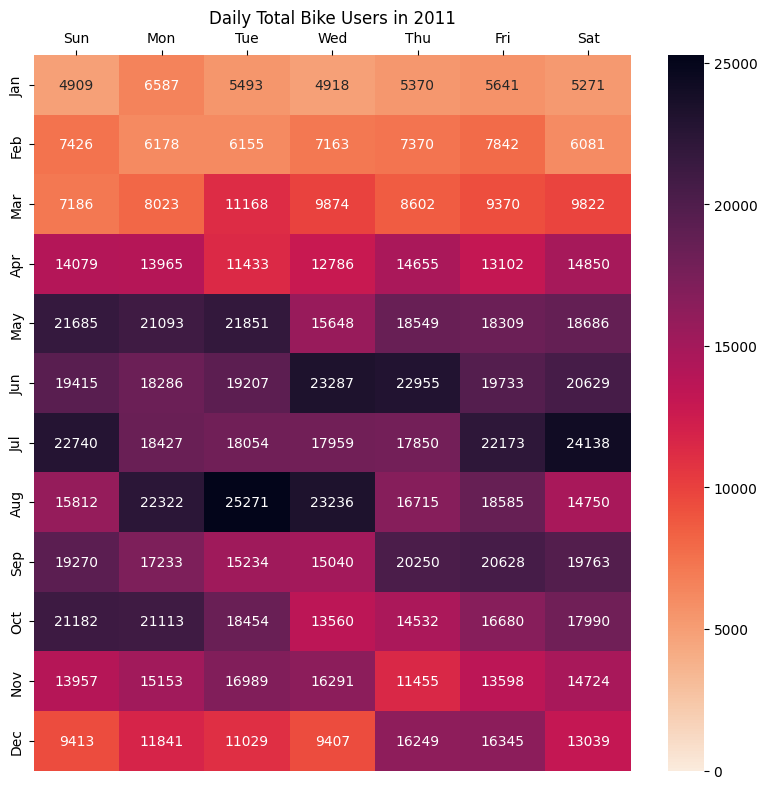

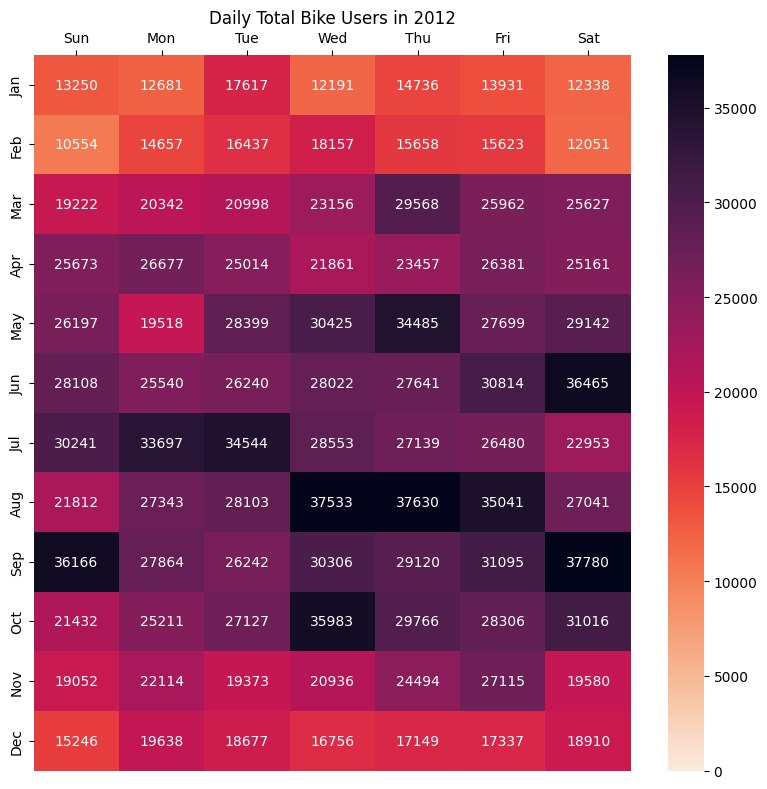

In [54]:
# Buat list yang berisi dataframe yang dipisah berdasarkan tahun
df_list = [hour_df[hour_df['year'] == 2011], hour_df[hour_df['year'] == 2012]]
year_list = ['2011', '2012']

# Buat heatmap dengan FOR loop
for df, year in zip(df_list, year_list):
    
    # Persiapkan kanvas figur
    plt.figure(figsize=(8,8))
    
    # Agregat data yang telah difilter
    df = df.groupby(['month_name', 'day_name'])['total'].sum().reset_index()

    # Buat heatmap
    ax = sns.heatmap(data=df.pivot('month_name', 'day_name', 'total'), vmin=0, annot=True, fmt='d', cmap='rocket_r')
    ax.xaxis.tick_top()
    ax.set(xlabel='', ylabel='')
    plt.title(f"Daily Total Bike Users in {year}")

    plt.tight_layout()
    plt.show()

Dari kedua matriks di atas dapat dilihat bahwa tidak ada perbedaan yang signifikan jumlah pengguna di tiap hari dalam seminggunya. Walaupun di bulan Agustus puncak pengguna ada di hari kerja (Rabu, Kamis, dan Jumat) atau di bulan September puncak pengguna ada di akhir pekan (Sabtu dan Minggu), tetap tidak menjelaskan pola yang *distinct* secara keseluruhan.

### 3. Kapan saja waktu dengan jumlah pengguna tertinggi dan terendah?

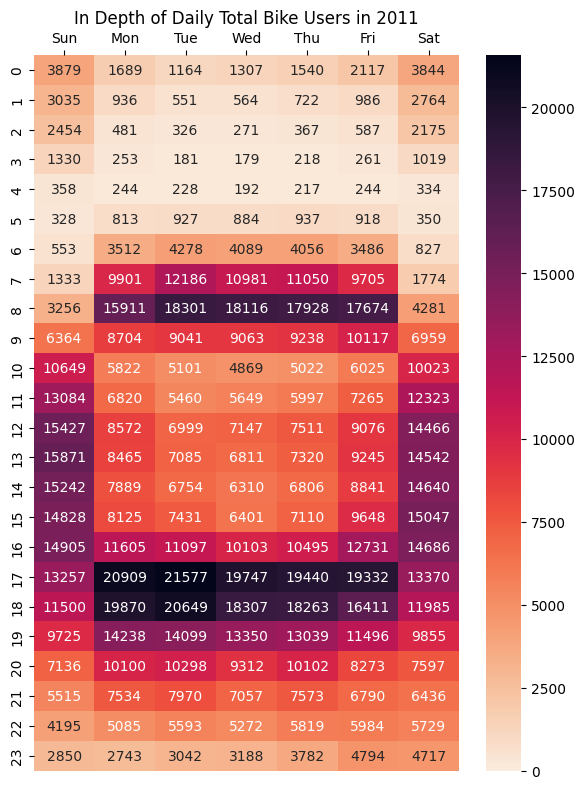

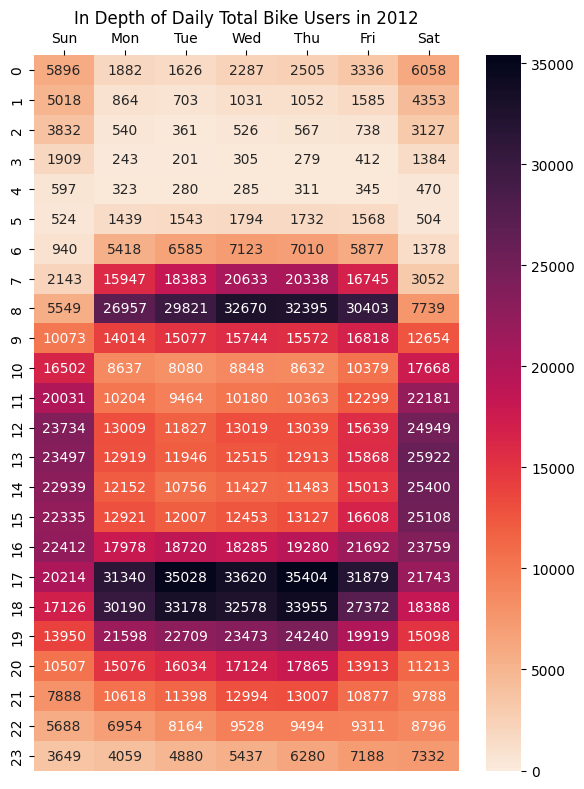

In [55]:
# Buat list yang berisi dataframe yang dipisah berdasarkan tahun
df_list = [hour_df[hour_df['year'] == 2011], hour_df[hour_df['year'] == 2012]]
year_list = ['2011', '2012']

# Buat heatmap dengan FOR loop
for df, year in zip(df_list, year_list):
    
    # Persiapkan kanvas figur
    plt.figure(figsize=(6,8))
    
    # Agregat data yang telah difilter
    df = df.groupby(['day_name', 'hour'])['total'].sum().reset_index()

    # Buat heatmap
    ax = sns.heatmap(data=df.pivot('hour', 'day_name', 'total'), vmin=0, annot=True, fmt='d', cmap='rocket_r')
    ax.xaxis.tick_top()
    ax.set(xlabel='', ylabel='')
    plt.title(f"In Depth of Daily Total Bike Users in {year}")

    plt.tight_layout()
    plt.show()

Baik di tahun 2011 dan 2012, kenaikan pengguna sepeda di hari kerja (Senin sampai Jumat) dimulai dari jam 5 pagi hingga mencapai puncaknya di jam 8 pagi. Kemudian, terjadi penurunan mulai dari jam 9 pagi dan jumlahnya cenderung stagnan hingga jam 3 sore. Lalu, terjadi peningkatan kembali mulai dari jam 4 sore hingga mencapai puncaknya di jam 6 sore. Setelah itu, terjadi penurunan jumlah pengguna secara gradual mulai dari jam 7 sampai 12 malam.

Beda halnya di akhir pekan (Sabtu dan Minggu), kenaikan pengguna sepeda dimulai dari jam 7 pagi hingga mencapai puncak di jam 1 siang. Uniknya, jumlah pengguna sepeda cenderung stagnan dari jam 12 siang sampai 4 sore. Setelah itu, terjadi penurunan secara gradual dari jam 5 sore sampai jam 3 pagi dini hari.

Perbedaan antara pola di hari kerja dan akhir pekan ini menjelaskan kebiasaan yang kontras. Di hari kerja, penggunaan sepeda digunakan untuk kegiatan bekerja. Hal ini ditunjukan dengan penggunaan sepeda yang jauh lebih pagi dibanding di akhir pekan dan kenaikannya terlihat di jam masuk dan pulang kerja. Sedangkan, di akhir pekan, penggunaan sepeda digunakan untuk kegiatan yang lebih umum. Ini terlihat dari tingginya pengguna di jam yang lebih siang dari hari kerja dan tetap tinggi di sepanjang hari (bahkan hingga dini hari).

### 4. Bagaimana tren pengguna sepeda pada tahun 2011-2012 berdasarkan musim?

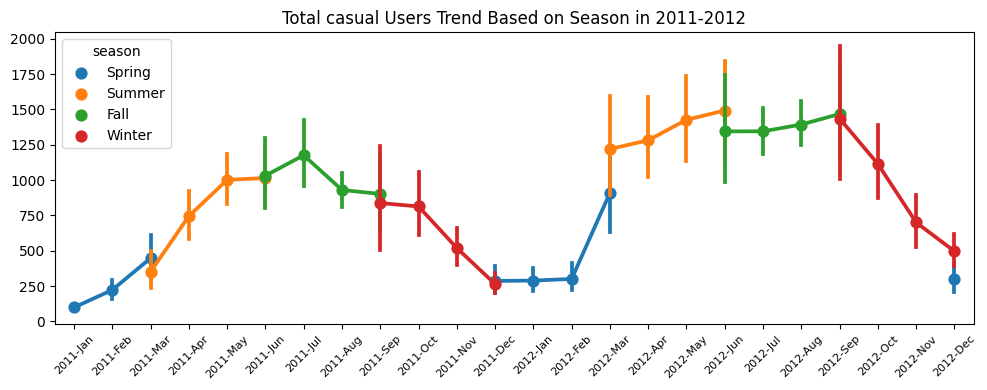

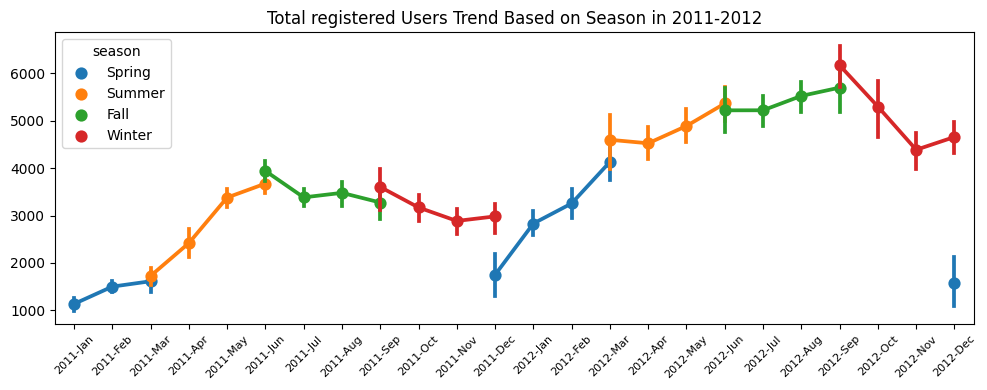

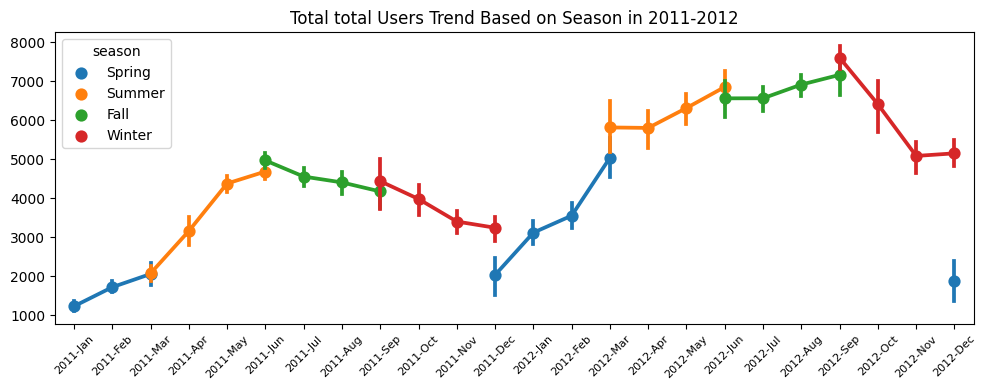

In [ ]:
# Define list of columns
col_list = ['casual', 'registered', 'total']

# Through FOR loop shows the lineplot
for col in col_list:
    # Setup the figure canvas
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

    # Aggregate the dataframe
    yvalue = hour_df.groupby(['date', 'yearmonth', 'season'])[col].sum().reset_index()
    yvalue = yvalue[yvalue[col] != 0]

    # Create a pointplot using seaborn
    sns.pointplot(data=yvalue, x='yearmonth', y=col, hue='season', palette='tab10')
    plt.title(f"Total {col} Users Trend Based on Season in 2011-2012")
    plt.ylabel(None)
    plt.xlabel(None)
    plt.xticks(rotation=45, fontsize=8)

    plt.tight_layout()
    plt.show()

Secara keseluruhan, baik pengguna kasual dan teregistrasi memperlihatkan pola yang sama. Peningkatan pengguna terlihat mulai dari musim semi (spring) sampai ke musim panas (summer). Kemudian, terjadi penurunan secara gradual dari musim gugur (Fall) sampai akhir musim dingin (winter). 

Jangan terkecoh dengan istilah naik dan turun. Walau terjadi penurunan, jumlah pengguna secara keseluruhan di musim gugur masih di atas jumlah pengguna di musim semi atau musim panas. Bahkan, di tahun 2012 pengguna sepeda di musim gugur justru meningkat hingga akhirnya turun drastis di musim dingin.

### 5. Musim apa yang menjadi favorit pengguna untuk bersepeda?

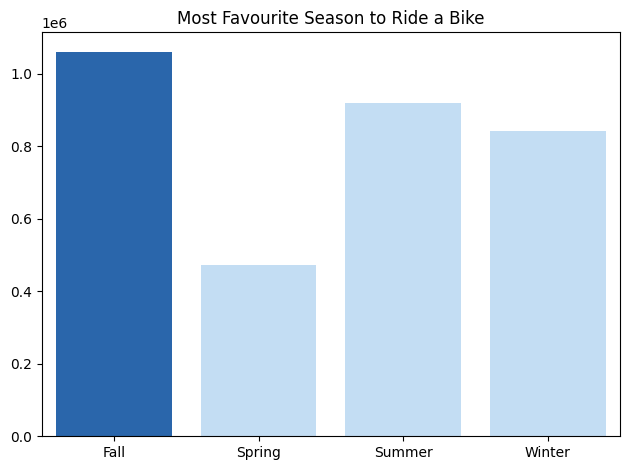

In [ ]:
# Definisikan palet warna ke dalam sebuah list
color_list = ['#1565c0','#bbdefb', '#bbdefb', '#bbdefb']

# Buat barplot
sns.barplot(data=hour_df.groupby('season')['total'].sum().reset_index(), 
            x='season', y='total', 
            errorbar=None, 
            palette=color_list)
plt.title("Most Favourite Season to Ride a Bike")
plt.xlabel(None)
plt.ylabel(None)

plt.tight_layout()
plt.show()

Musim yang paling disenangi oleh pengguna adalah musim gugur (fall), lalu diikuti oleh musim panas (summer), musim dingin (winter), dan musim dingin di urutan terakhir.

### 6. Apa kondisi cuaca yang terdapat paling banyak pengguna sepeda?

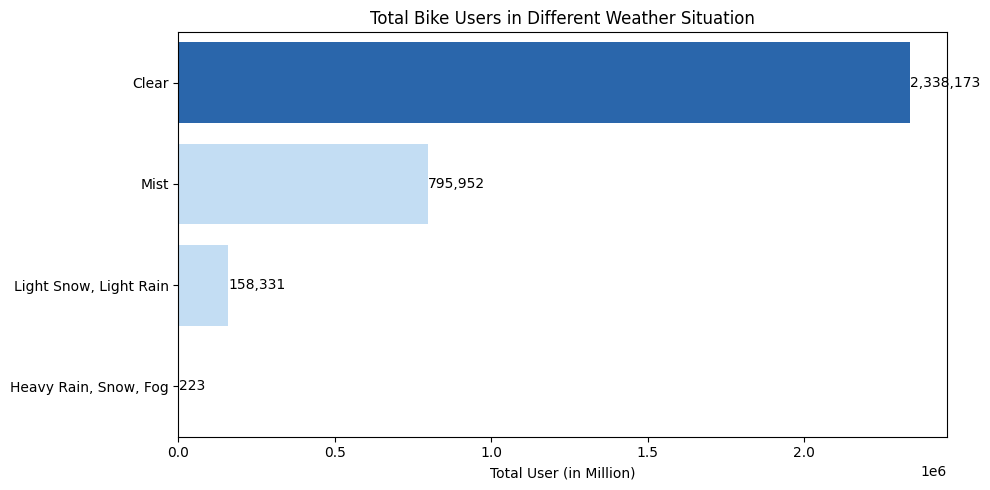

In [ ]:
# Menyalin data dari hour_df
weather_plot = hour_df[['weather', 'total']]

# Mengganti data weather dengan kondisi dominannya
weather_plot.replace({'weather': ['Clear, Few clouds, Partly cloudy',
                                  'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                  'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                  'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']},
                    {'weather': ['Clear', 'Mist', 'Light Snow, Light Rain', 'Heavy Rain, Snow, Fog']},
                    inplace=True
                    )

# Agregat total pengguna berdasarkan weather
weather_plot = weather_plot.groupby('weather')['total'].sum().reset_index()

# Urutkan tabel berdasarkan total pengguna dengan urutan menurun
weather_plot = weather_plot.sort_values('total', ascending=False)

# Definisikan palet warna
color_list = ['#1565c0', '#bbdefb', '#bbdefb', '#bbdefb']
# Buat barplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.barplot(data=weather_plot, x='total', y='weather', palette=color_list)
plt.title("Total Bike Users in Different Weather Situation")
plt.ylabel(None)
plt.xlabel("Total User (in Million)")

# Tambahkan data label
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f"{width:,.0f}", ha='left', va='center')

plt.tight_layout()
plt.show()

Pengguna sepeda lebih senang berkendara di cuaca yang dominan cerah. Diikuti dengan pengendara yang senang berkendara di cuaca berkabut tipis (mist) dan hujan ringan atau bersalju ringan. Hanya ada sebagian kecil yang berkendara di kondisi hujan lebat.

### 7. Apa hubungan antara parameter cuaca dan jumlah pengguna sepeda?

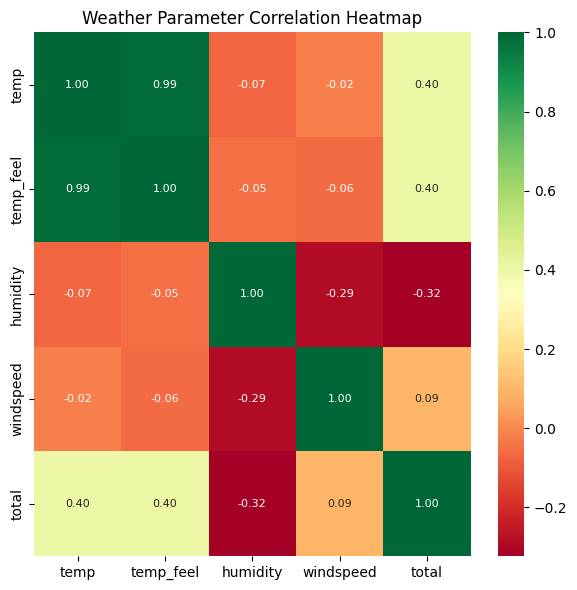

In [ ]:
# Buat variabel korelasi
weather_corr = hour_df[['temp', 'temp_feel', 'humidity', 'windspeed', 'total']]
weather_corr = weather_corr.corr()

# Buat matriks korelasi menggunakan heatmap
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.heatmap(data=weather_corr, 
            vmax=1, 
            cmap='RdYlGn', 
            annot=True, 
            annot_kws={'fontsize':8}, 
            fmt='.2f'
            )
plt.title("Weather Parameter Correlation Heatmap")
plt.xlabel(None)
plt.ylabel(None)

plt.tight_layout()
plt.show()

## Conclusion

1. Terdapat pola unik pada tren penggunaan sepeda. Di semester awal (mulai dari bulan Januari) jumlah pengguna sepeda meningkat secara konstan hingga mencapai puncak di bulan Juni. Kemudian, di akhir bulan Juni atau awal bulan Juli (semester kedua) terjadi penurunan secara perlahan hingga bulan Desember. Meskipun begitu, jumlah penurunan pengguna masih di atas kuartal pertama.
   
2. Secara umum, tidak ada perbedaan yang signifikan pada jumlah pengguna di hari kerja (Senin sampai Jumat) dan di hari libur (Sabtu dan Minggu). Ada beberapa bulan di mana pengguna sepeda banyak di hari libur atau di hari kerja.
   
3. Baik di tahun 2011 dan 2012, terbentuk pola yang unik kapan saja waktu dengan pengguna sepeda terbanyak. Dapat dilihat bahwa di hari kerja (Senin sampai Jumat) terjadi kenaikan pengguna sepeda mulai dari jam 6 sampai 9 pagi, kemudian cenderung fluktuatif dari jam 10 pagi sampai jam 3 sore. Kemudian meningkat lagi dari jam 4 sore sampai jam 7 malam dengan puncaknya di jam 5 sampai 6 sore. Sedangkan di hari libur (Sabtu dan Minggu) pengguna mulai naik dari jam 7 sampai 10 pagi, lalu stagnan di puncak dari jam 11 pagi sampai jam 5 sore, hingga akhirnya turun mulai jam 6 sore. Ini menunjukkan bahwa kebiasaan penggunaan sepeda sebagai moda transportasi masih umum digunakan baik di hari kerja dan di hari libur di rentang waktu yang sama.
   
4. Musim mempengaruhi jumlah pengguna sepeda. Pengguna sepeda mulai meningkat saat di musim semi (Spring) hingga musim panas (Summer). Bahkan di tahun 2012 kenaikan terjadi hingga musim gugur (Fall). Lalu, penurunan terjadi pada saat musim dingin (Winter).

5. Secara umum pengguna lebih senang mengendarai sepeda pada kondisi cuaca yang cerah.

6. Terdapat pengaruh dan korelasi yang lemah antara temperatur dan jumlah pengguna. Begitu juga antara tingkat kelembapan dengan jumlah pengguna, hanya saja semakin tinggi kelembapan udara semakin menurunkan jumlah pengguna (korelasi negatif). Terakhir, terdapat pengaruh yang sangat lemah antara kecepatan udara dengan jumlah pengguna, namun tidak ada korelasi di antara keduanya. 

## Save The Main Data

In [ ]:
# Specify the output folder
folder_path = '../DICODING-Bike_Sharing_Dashboard/dashboard/'

# Create a list of processed data
df_list = [day_df, hour_df]
file_name = ['day_df.csv', 'hour_df.csv']

# Save data to CSV using FOR loop
for df, file in zip(df_list, file_name):
    df.to_csv(f"{folder_path}{file}", index=False)